## Dataset frame distribution

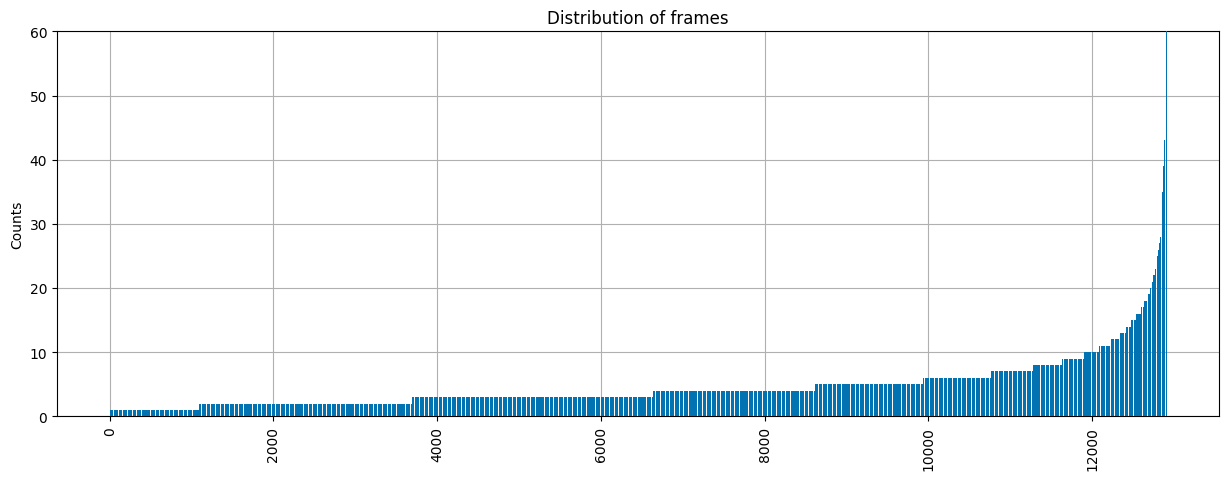

4.687374128582494
3.0


In [2]:
import matplotlib.pyplot as plt
from pathlib import Path
from collections import Counter
import numpy as np
import seaborn as sns
colors = sns.color_palette("colorblind6")

# Data path
main_path = Path("./data/training/")

# Find all images and clips
all_images = np.array([f for f in main_path.glob("**/*.jpg")])
diff_clips = [f.name.split(".")[0] for f in all_images]

# Count how many times each clip appears
clip_counts = Counter(diff_clips)
clip_names = list(clip_counts.keys())
clip_values = sorted(list(clip_counts.values()))

plt.figure(figsize=(15, 5))
plt.bar(range(len(clip_values)), clip_values, color=colors[0], zorder=3)
plt.ylabel('Counts')
plt.title('Distribution of frames')
plt.grid(zorder=0)
plt.ylim([0, 60])
plt.xticks(rotation=90)
plt.show()

print(np.mean(clip_values))
print(np.median(clip_values))


# Frames per class

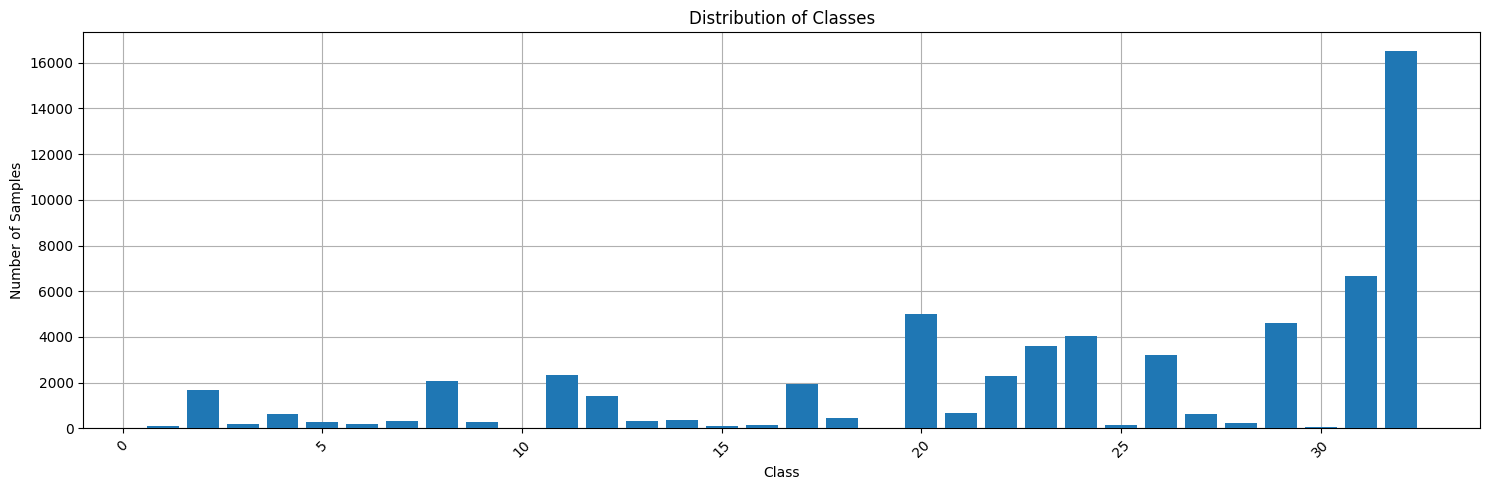

Total number of frames: 60514
Number of classes: 32

Frames per class:
Class 1: 104 frames
Class 2: 1698 frames
Class 3: 183 frames
Class 4: 634 frames
Class 5: 266 frames
Class 6: 191 frames
Class 7: 306 frames
Class 8: 2060 frames
Class 9: 279 frames
Class 10: 12 frames
Class 11: 2345 frames
Class 12: 1403 frames
Class 13: 327 frames
Class 14: 347 frames
Class 15: 97 frames
Class 16: 163 frames
Class 17: 1963 frames
Class 18: 464 frames
Class 19: 14 frames
Class 20: 4994 frames
Class 21: 686 frames
Class 22: 2290 frames
Class 23: 3588 frames
Class 24: 4025 frames
Class 25: 158 frames
Class 26: 3224 frames
Class 27: 622 frames
Class 28: 219 frames
Class 29: 4618 frames
Class 30: 57 frames
Class 31: 6671 frames
Class 32: 16506 frames


In [10]:
clip_class = np.array([int(f.parent.name) for f in all_images])

# Create class distribution plot
plt.figure(figsize=(15, 5))
class_counts = np.bincount(clip_class)[1:]
plt.bar(range(1, len(class_counts) + 1), class_counts, zorder=3)
plt.title('Distribution of Classes')
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.grid(zorder=1)
plt.tight_layout()
plt.show()

# Print class statistics
print(f"Total number of frames: {len(clip_class)}")
print(f"Number of classes: {len(np.unique(clip_class))}")
print("\nFrames per class:")
for c in range(1, 33):
    count = np.sum(clip_class == c)
    print(f"Class {c}: {count} frames")